# 3. Matching

## 3.1 Import data

In [1]:
cd ..

/home/julian/PycharmProjects/corporate_disruptions


In [2]:
import parameters
import matplotlib.pyplot as plt
import pandas as pd

### 3.1.1 Import sample

In [3]:
import pandas as pd

sample = pd.read_feather("downloads/sample 2019-04-20.feather")

In [4]:
sample.head()

,gvkey,name,SIC,NAICS,GICS_group,GICS_industry,GICS_sector,GICS_subindustry,execid,year,personnel_full_name,personnel_is_ceo
0,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2006.0,Bradbury H. Anderson,True
1,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2007.0,Bradbury H. Anderson,True
2,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2008.0,Bradbury H. Anderson,True
3,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2009.0,Bradbury H. Anderson,False
4,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,13283,2006.0,Darren R. Jackson,False


In [5]:
len(sample)

2676

In [6]:
sample['year'].value_counts()

2006.0    237
2007.0    234
2013.0    231
2012.0    229
2008.0    224
2010.0    223
2011.0    222
2009.0    221
2016.0    210
2014.0    209
2015.0    206
2017.0    196
2018.0     32
Name: year, dtype: int64

### 3.1.2 Remove empty observations

Empty observations are those for which no personnel was identified by compustat in any year, and thus year has received a nan when merging compustat data on companies with compustat data on personnel. We will remove those for now.

In [7]:
sum(pd.isna(sample['execid']))

2

In [8]:
sample[pd.isna(sample['execid'])]

,gvkey,name,SIC,NAICS,GICS_group,GICS_industry,GICS_sector,GICS_subindustry,execid,year,personnel_full_name,personnel_is_ceo
875,007127,May Department Stores Co,5311,452111,2550,255030,25,25503010,None,NaN,None,False
1155,009563,Sears Roebuck & Co,5311,452111,2550,255030,25,25503010,None,NaN,None,False


In [9]:
len(sample)

2676

In [10]:
sample = sample[~pd.isna(sample['execid'])]

In [11]:
len(sample)

2674

### 3.1.2 Import recalls

In [12]:
recalls = pd.read_csv(parameters.recalls)
recalls.head(3)

,country,date,description,hazard,importer,incidents,link,name,remedy,retailer,units
0,China,"March 14, 2019",This recall involves Mobile Warming Performanc...,"The lithium-ion battery can overheat, melt or ...","Tech Gear 5.7, Inc., of San Marcos, Calif.",Tech Gear 5.7 has received four reports of bat...,https://cpsc.gov/Recalls/2019/Tech-Gear-5-7-Re...,Mobile Warming Performance Heated Socks,Refund,\r\n,"4,000"
1,China,"March 12, 2019",The recall expansion involves lithium-ion batt...,"The lithium-ion batteries can overheat, posing...","HP Inc., of Palo Alto, Calif.",HP has received eight new reports of battery p...,https://cpsc.gov/Recalls/2019/HP-Expands-Recal...,Lithium-ion batteries for HP commercial notebo...,Replace,HP and authorized dealers nationwide and onlin...,"About 78,500 (In addition 50,000 were previous..."
2,Taiwan and China,"March 14, 2019",This recall involves O’Brien Performer Pro Com...,The skis can detach from the binding during a ...,"O’Brien Watersports Inc., of Snoqualmie, Wash.",O’Brien Watersports has received three reports...,https://cpsc.gov/Recalls/2019/OBrien-Waterspor...,Performer Pro Combo water skis,Refund,\r\n,"About 3,560 (in addition, about 700 were sold ..."


Make sure data is a date column.

In [13]:
recalls['date'] = pd.to_datetime(recalls['date'])

In [14]:
recalls.head(3)

,country,date,description,hazard,importer,incidents,link,name,remedy,retailer,units
0,China,2019-03-14,This recall involves Mobile Warming Performanc...,"The lithium-ion battery can overheat, melt or ...","Tech Gear 5.7, Inc., of San Marcos, Calif.",Tech Gear 5.7 has received four reports of bat...,https://cpsc.gov/Recalls/2019/Tech-Gear-5-7-Re...,Mobile Warming Performance Heated Socks,Refund,\r\n,"4,000"
1,China,2019-03-12,The recall expansion involves lithium-ion batt...,"The lithium-ion batteries can overheat, posing...","HP Inc., of Palo Alto, Calif.",HP has received eight new reports of battery p...,https://cpsc.gov/Recalls/2019/HP-Expands-Recal...,Lithium-ion batteries for HP commercial notebo...,Replace,HP and authorized dealers nationwide and onlin...,"About 78,500 (In addition 50,000 were previous..."
2,Taiwan and China,2019-03-14,This recall involves O’Brien Performer Pro Com...,The skis can detach from the binding during a ...,"O’Brien Watersports Inc., of Snoqualmie, Wash.",O’Brien Watersports has received three reports...,https://cpsc.gov/Recalls/2019/OBrien-Waterspor...,Performer Pro Combo water skis,Refund,\r\n,"About 3,560 (in addition, about 700 were sold ..."


## 3.2 Clean company names

In [15]:
sample.name.unique()

array(['Best Buy Co Inc', 'Officemax Inc', 'Circuit City Stores Inc',
       'Target Corp', 'Dillards Inc  -Cl A', 'Dollar General Corp',
       'Family Dollar Stores', "Macy'S Inc", 'Gap Inc',
       'Genuine Parts Co', 'Home Depot Inc', 'Sears Holdings Corp',
       'L Brands Inc', "Lowe'S Companies Inc", 'Nordstrom Inc',
       'Penney (J C) Co', 'Autonation Inc', 'Ross Stores Inc',
       'Rs Legacy Corp', 'Toys R Us Inc', 'Foot Locker Inc',
       'Tjx Companies Inc', 'Big Lots Inc', 'Tiffany & Co',
       'Office Depot Inc', 'Signet Jewelers Ltd', 'Staples Inc',
       'Autozone Inc', "Kohl'S Corp", 'Bed Bath & Beyond Inc',
       "O'Reilly Automotive Inc", 'Petsmart Inc', 'Urban Outfitters Inc',
       'Tractor Supply Co', 'Dollar Tree Inc',
       'Abercrombie & Fitch  -Cl A', 'Carmax Inc', 'Gamestop Corp',
       'Advance Auto Parts Inc', 'Lkq Corp', 'Ulta Beauty Inc'],
      dtype=object)

In [16]:
sample['name_clean'] = sample['name']

### 3.2.1 Make everything lowercase.

In [17]:
sample['name_clean'] = sample['name_clean'].str.lower()

### 3.2.2 Remove special characters

In [18]:
sample['name_clean'] = sample['name_clean'].str.replace('[^\w\s]', '')

### 3.2.3 Remove resulting double spaces

In [19]:
sample['name_clean'] = sample['name_clean'].str.replace('  ', ' ')

### 3.2.4 Remove abbreviations like Inc, Co, etc.

We add a space to the end of the strings to be able to only remove full words. Otherwise, removing " co" would mess up occurances of "corp".

In [20]:
sample['name_clean'] = sample['name_clean'] + ' '

In [21]:
company_terms = [' co ', ' inc ', ' corp ', ' cl ', ' a ', ' ltd ', ' stores ', ' holdings ']

for term in company_terms:
    sample['name_clean'] = sample['name_clean'].str.replace(term, ' ')

Remove trailing whitespace.

In [22]:
sample['name_clean'] = sample['name_clean'].str.strip()

Inspect results.

In [23]:
sample.name_clean.unique()

array(['best buy', 'officemax', 'circuit city', 'target', 'dillards',
       'dollar general', 'family dollar', 'macys', 'gap', 'genuine parts',
       'home depot', 'sears', 'l brands', 'lowes companies', 'nordstrom',
       'penney j c', 'autonation', 'ross', 'rs legacy', 'toys r us',
       'foot locker', 'tjx companies', 'big lots', 'tiffany',
       'office depot', 'signet jewelers', 'staples', 'autozone', 'kohls',
       'bed bath beyond', 'oreilly automotive', 'petsmart',
       'urban outfitters', 'tractor supply', 'dollar tree',
       'abercrombie fitch', 'carmax', 'gamestop', 'advance auto parts',
       'lkq', 'ulta beauty'], dtype=object)

The results look promising, but there might be some missmatches for gap. JCPenney might also need some alternative names (e.g., jcpenney), so we will remove those for now. Another entry to pay attention to is "staples" which might also yield missmatches.

### 3.2.5 Drop ambiguous

In [24]:
ambiguous = ['penney j c', 'gap']

In [25]:
ambiguous = sample['name_clean'].isin(ambiguous)

sample = sample[~ambiguous].reset_index(drop=True)

In [26]:
sample.head()

,gvkey,name,SIC,NAICS,GICS_group,GICS_industry,GICS_sector,GICS_subindustry,execid,year,personnel_full_name,personnel_is_ceo,name_clean
0,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2006.0,Bradbury H. Anderson,True,best buy
1,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2007.0,Bradbury H. Anderson,True,best buy
2,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2008.0,Bradbury H. Anderson,True,best buy
3,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2009.0,Bradbury H. Anderson,False,best buy
4,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,13283,2006.0,Darren R. Jackson,False,best buy


## 3.3 Clean recall data

We look for matches in the retailer column.

### 3.3.1 Make everything lowercase

In [27]:
recalls['retailer'] = recalls['retailer'].str.lower()

### 3.3.2 Remove special characters

In [28]:
recalls['retailer'] = recalls['retailer'].str.replace('[^\w\s]', '')

### 3.3.3 Remove resulting double spaces

In [29]:
recalls['retailer'] = recalls['retailer'].str.replace('  ', ' ')

## 3.4 Check for complete cases

Some companies do not have executives registered in compustat in some years. We want to have all possible combinations in the dataset to match with the recalls. We create otherwise empty columns for those observations.

In [30]:
companies = sample['name_clean'].unique()
print(companies)

['best buy' 'officemax' 'circuit city' 'target' 'dillards'
 'dollar general' 'family dollar' 'macys' 'genuine parts' 'home depot'
 'sears' 'l brands' 'lowes companies' 'nordstrom' 'autonation' 'ross'
 'rs legacy' 'toys r us' 'foot locker' 'tjx companies' 'big lots'
 'tiffany' 'office depot' 'signet jewelers' 'staples' 'autozone' 'kohls'
 'bed bath beyond' 'oreilly automotive' 'petsmart' 'urban outfitters'
 'tractor supply' 'dollar tree' 'abercrombie fitch' 'carmax' 'gamestop'
 'advance auto parts' 'lkq' 'ulta beauty']


In [31]:
years = sample['year'].unique()
print(years)

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018.]


In [32]:
rows_before = len(sample)
print(rows_before)

2525


In [33]:
import itertools as it

combinations = list(it.product(companies, years))
combinations[:5]

[('best buy', 2006.0),
 ('best buy', 2007.0),
 ('best buy', 2008.0),
 ('best buy', 2009.0),
 ('best buy', 2010.0)]

In [34]:
missing_combination = [True not in 
                       ((sample['name_clean'] == combination[0]) & (sample['year'] == combination[1]))
                       for combination in combinations]
sum(missing_combination)

0

Fortunately, there are no missing cases. We don't have to add any dummy rows and can use the number of rows for each company-year set to see the number of managers/executives.

## 3.5 Find companies in recalls

### 3.5.1 Run testrun

In [35]:
company = sample['name_clean'].unique()[0]
print(company)

best buy


In [36]:
test = recalls['retailer'].str.contains(company, na=False)

In [37]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

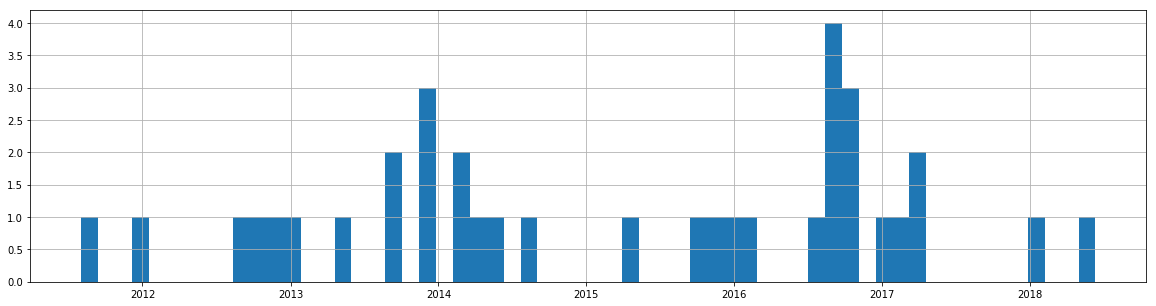

In [38]:
best_buy_hist = recalls[test].date.hist(figsize=(20,5), bins=60)
plt.show(best_buy_hist)

Seems to be working as expected. In the next step, we want to find all matches per company-year observation.

In [39]:
recalls['year'] = recalls['date'].dt.year

In [40]:
pd.value_counts(recalls[test]['year'])

2016.0    9
2013.0    6
2012.0    5
2014.0    5
2015.0    4
2017.0    4
2018.0    2
2011.0    1
Name: year, dtype: int64

### 3.5.2 Find all matches

In [41]:
len(recalls)

7235

In [42]:
recalls_matched = pd.DataFrame()

In [43]:
for company in sample['name_clean'].unique():
    matches = recalls['retailer'].str.contains(company, na=False)
    matches = pd.value_counts(recalls[matches]['year']).rename('recalls').to_frame()
    matches['name_clean'] = company
    recalls_matched = recalls_matched.append(matches)

In [44]:
recalls_matched.index.names = ['year']

In [45]:
recalls_matched

,recalls,name_clean
year,,
2016.0,9,best buy
2013.0,6,best buy
2012.0,5,best buy
2014.0,5,best buy
2015.0,4,best buy
2017.0,4,best buy
2018.0,2,best buy
2011.0,1,best buy
2016.0,2,officemax


In [46]:
len(recalls_matched)

134

## 3.6 Merge

In [47]:
len(sample)

2525

In [48]:
recalls_matched = pd.merge(sample, recalls_matched, on=['name_clean', 'year'], how='left')

We accurately report that we have not found recalls where the value is NA.

In [49]:
recalls_matched['recalls'] = recalls_matched['recalls'].fillna(0)

In [50]:
recalls_matched.head()

,gvkey,name,SIC,NAICS,GICS_group,GICS_industry,GICS_sector,GICS_subindustry,execid,year,personnel_full_name,personnel_is_ceo,name_clean,recalls
0,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2006.0,Bradbury H. Anderson,True,best buy,0.0
1,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2007.0,Bradbury H. Anderson,True,best buy,0.0
2,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2008.0,Bradbury H. Anderson,True,best buy,0.0
3,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2009.0,Bradbury H. Anderson,False,best buy,0.0
4,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,13283,2006.0,Darren R. Jackson,False,best buy,0.0


In [51]:
len(recalls_matched)

2525

In [52]:
recalls_matched

,gvkey,name,SIC,NAICS,GICS_group,GICS_industry,GICS_sector,GICS_subindustry,execid,year,personnel_full_name,personnel_is_ceo,name_clean,recalls
0,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2006.0,Bradbury H. Anderson,True,best buy,0.0
1,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2007.0,Bradbury H. Anderson,True,best buy,0.0
2,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2008.0,Bradbury H. Anderson,True,best buy,0.0
3,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,06175,2009.0,Bradbury H. Anderson,False,best buy,0.0
4,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,13283,2006.0,Darren R. Jackson,False,best buy,0.0
5,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,13283,2007.0,Darren R. Jackson,False,best buy,0.0
6,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,28397,2006.0,Brian J. Dunn,False,best buy,0.0
7,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,28397,2007.0,Brian J. Dunn,False,best buy,0.0
8,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,28397,2008.0,Brian J. Dunn,False,best buy,0.0
9,002184,Best Buy Co Inc,5731,443142,2550,255040,25,25504020,28397,2009.0,Brian J. Dunn,True,best buy,0.0


## 3.6 Save to feather

In [53]:
from datetime import date

recalls_matched.to_feather('{0}/recalls_matched {1}.feather'.format(
    parameters.preprocessed_folder, str(date.today())))